<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/code/RBD_AdvDec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# @title Install dependancies
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data files
import platform # paths use different dividers on linux vs windows, so we need to test for this
import string
from scipy.stats import sem
import matplotlib.pyplot as plt

In [53]:
#@title Load Data:
Adv_C_In = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/Adv_C_In.csv", header=0)
Adv_W_In = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/Adv_W_In.csv", header=0)
Adv_C_Out = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/Adv_C_Out.csv", header=0)
Adv_W_Out = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/Adv_W_Out.csv", header=0)


In [54]:
#@title Data subsetting and recoding

#Correct ID formatting
Adv_C_In['Participant Private ID'] = [int(sub) for sub in Adv_C_In['Participant Private ID']]
Adv_C_In['Participant Private ID'] = Adv_C_In['Participant Private ID'].astype(str)
Adv_W_In['Participant Private ID'] = [int(sub) for sub in Adv_W_In['Participant Private ID']]
Adv_W_In['Participant Private ID'] = Adv_W_In['Participant Private ID'].astype(str)
Adv_C_Out['Participant Private ID'] = [int(sub) for sub in Adv_C_Out['Participant Private ID']]
Adv_C_Out['Participant Private ID'] = Adv_C_Out['Participant Private ID'].astype(str)
Adv_W_Out['Participant Private ID'] = [int(sub) for sub in Adv_W_Out['Participant Private ID']]
Adv_W_Out['Participant Private ID'] = Adv_W_Out['Participant Private ID'].astype(str)

#Specify Parameters
totRew = 10
totPun = 8
totDec = totRew + totPun

# Recode Rewards as 1 and Punish as 0
Adv_C_In = Adv_C_In.replace('Reward', 1); Adv_C_In = Adv_C_In.replace('Punish', 0)
Adv_W_In = Adv_W_In.replace('Reward', 1); Adv_W_In = Adv_W_In.replace('Punish', 0)
Adv_C_Out = Adv_C_Out.replace('Reward', 1); Adv_C_Out = Adv_C_Out.replace('Punish', 0)
Adv_W_Out = Adv_W_Out.replace('Reward', 1); Adv_W_Out = Adv_W_Out.replace('Punish', 0)

In [55]:
#@title Compute Reward Bias by Conditions

#Compute Bias for Chinese Participants
RewBias_C_In = []
for p in Adv_C_In['Participant Private ID'].unique():
  datpi = Adv_C_In.loc[Adv_C_In['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_P1 = datpi.loc[datpi['Spreadsheet: Adv'] == 2]
  RewBias = sum(datpi_P1['Response'])/totRew
  RewBias_C_In.append(RewBias)

RewBias_C_Out = []
for p in Adv_C_Out['Participant Private ID'].unique():
  datpi = Adv_C_Out.loc[Adv_C_Out['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_P1 = datpi.loc[datpi['Spreadsheet: Adv'] == 2]
  RewBias = sum(datpi_P1['Response'])/totRew
  RewBias_C_Out.append(RewBias)

RewBias_W_In = []
for p in Adv_W_In['Participant Private ID'].unique():
  datpi = Adv_W_In.loc[Adv_W_In['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_P1 = datpi.loc[datpi['Spreadsheet: Adv'] == 2]
  RewBias = sum(datpi_P1['Response'])/totRew
  RewBias_W_In.append(RewBias)

RewBias_W_Out = []
for p in Adv_W_Out['Participant Private ID'].unique():
  datpi = Adv_W_Out.loc[Adv_W_Out['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_P1 = datpi.loc[datpi['Spreadsheet: Adv'] == 2]
  RewBias = sum(datpi_P1['Response'])/totRew
  RewBias_W_Out.append(RewBias)

In [58]:
#@title Compute Reward Bias means and SEM
RewBias_C_In_mean = np.mean(RewBias_C_In)
RewBias_C_In_SEM = sem(RewBias_C_In)

RewBias_C_Out_mean = np.mean(RewBias_C_Out)
RewBias_C_Out_SEM = sem(RewBias_C_Out)

RewBias_W_In_mean = np.mean(RewBias_W_In)
RewBias_W_In_SEM = sem(RewBias_W_In)

RewBias_W_Out_mean = np.mean(RewBias_W_Out)
RewBias_W_Out_SEM = sem(RewBias_W_Out)

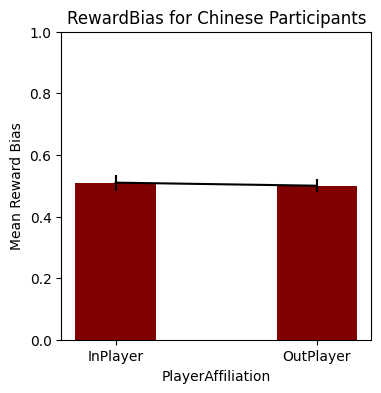

In [77]:
#@title Vizualization: Bar Plot of means and SEM

data = {'InPlayer':RewBias_C_In_mean, 'OutPlayer':RewBias_C_Out_mean}
groups = list(data.keys())
meanBias = list(data.values())
SEM = [RewBias_C_In_SEM, RewBias_C_Out_SEM]

fig = plt.figure(figsize = (4, 4))

# creating the bar plot
plt.bar(groups, meanBias, color ='maroon',
        width = 0.4)

plt.errorbar(groups, meanBias, yerr=SEM, color='black')
plt.ylim(0,1)
plt.xlabel("PlayerAffiliation")
plt.ylabel("Mean Reward Bias")
plt.title("RewardBias for Chinese Participants")
plt.show()